<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>DP</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            line-height: 1.6;
            margin: 20px;
        }
        h1, h2 {
            color: #2c3e50;
        }
        p {
            margin: 10px 0;
        }
    </style>
</head>
<body>
    <h1>Descripción del Proyecto</h1>
    <p>El primer paso de nuestro proyecto fue extraer una base de datos del gobierno de Colombia con los resultados de las pruebas Saber PRO desde 2018 hasta 2022. Estas pruebas evalúan el rendimiento de los profesionales recién graduados en diferentes áreas del conocimiento.</p>
    <p>La base de datos original contaba con aproximadamente un millón de registros, lo que representaba un volumen de datos considerable. Para poder operar con tranquilidad y realizar un análisis más manejable, se decidió utilizar una décima parte de dicha base de datos, seleccionando un subconjunto representativo de los registros disponibles.</p>
    
</body>
</html>


In [1]:
from google.colab import drive
import pandas as pd

# Montar Google Drive
drive.mount('/content/drive')

# Ruta al archivo Excel reducido en tu Google Drive
file_path_reducido = '/content/drive/MyDrive/Colab Notebooks/Proyecto_Final_Modelacion/Datos_Refinados_Reducidos.xlsx'

# Cargar el archivo Excel reducido
data_reducida = pd.read_excel(file_path_reducido)

# Verificar las primeras filas del DataFrame reducido
print(data_reducida.head())


Mounted at /content/drive
   ESTU_COD_RESIDE_DEPTO ESTU_DEPTO_RESIDE  ESTU_COD_RESIDE_MCPIO  \
0                     11            BOGOTÁ                  11001   
1                     76             VALLE                  76736   
2                     73            TOLIMA                  73001   
3                     68         SANTANDER                  68081   
4                     11            BOGOTÁ                  11001   

  ESTU_MCPIO_RESIDE  ESTU_COD_DEPTO_PRESENTACION  INST_COD_INSTITUCION  \
0       BOGOTÁ D.C.                         11.0                  2834   
1           SEVILLA                         76.0                  1203   
2            IBAGUÉ                         73.0                  2829   
3   BARRANCABERMEJA                         68.0                  2207   
4       BOGOTÁ D.C.                         11.0                  1208   

                             INST_NOMBRE_INSTITUCION  \
0  UNIVERSITARIA AGUSTINIANA- UNIAGUSTINIANA-BOGO...   
1 

<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Descripción del Proyecto - Sección 2</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            line-height: 1.6;
            margin: 20px;
        }
        h1, h2 {
            color: #2c3e50;
        }
        p {
            margin: 10px 0;
        }
        ul {
            list-style-type: square;
            margin: 10px 0 10px 20px;
        }
    </style>
</head>
<body>
    <h2>Depuración y Selección de Variables</h2>
    <p>Posteriormente, depuramos un listado de columnas que de manera arbitraria escogimos, las cuales pensamos que podrían tener mayor incidencia en el comportamiento de los datos. El producto final fue la escogencia de las siguientes variables:</p>
    <ul>
        <li>'ESTU_COD_RESIDE_DEPTO'</li>
        <li>'ESTU_DEPTO_RESIDE'</li>
        <li>'INST_COD_INSTITUCION'</li>
        <li>'INST_NOMBRE_INSTITUCION'</li>
        <li>'ESTU_SNIES_PRGMACADEMICO'</li>
        <li>'ESTU_NUCLEO_PREGRADO'</li>
        <li>'ESTU_PAGOMATRICULABECA'</li>
        <li>'ESTU_GENERO'</li>
        <li>'FAMI_ESTRATOVIVIENDA'</li>
        <li>'MOD_RAZONA_CUANTITAT_PUNT'</li>
    </ul>
    <p>Noten en este apartado que algunas variables no estaban codificadas, así que gran parte del trabajo consistió primero en hacer una limpieza de datos en blanco y luego cambiar variables como Género, Beca, Estrato y demás a variables numéricas.</p>
    <p>A su vez, es importante aclarar en esta sección que nuestra variable dependiente es el resultado de razonamiento cuantitativo en las pruebas.</p>
</body>
</html>


In [48]:
import pandas as pd
from google.colab import drive

# Ruta al archivo Excel reducido en tu Google Drive
file_path_reducido = '/content/drive/MyDrive/Colab Notebooks/Proyecto_Final_Modelacion/Datos_Refinados_Reducidos.xlsx'

# Cargar el archivo Excel reducido
data = pd.read_excel(file_path_reducido)

# Seleccionar solo las columnas especificadas
columnas_seleccionadas = [
    'ESTU_COD_RESIDE_DEPTO',
    'ESTU_DEPTO_RESIDE',
    'INST_COD_INSTITUCION',
    'INST_NOMBRE_INSTITUCION',
    'ESTU_SNIES_PRGMACADEMICO',
    'ESTU_NUCLEO_PREGRADO',
    'ESTU_PAGOMATRICULABECA',
    'ESTU_GENERO',
    'FAMI_ESTRATOVIVIENDA',
    'MOD_RAZONA_CUANTITAT_PUNT'
]

data_reducida = data[columnas_seleccionadas]

# Eliminar todas las filas que contienen valores NaN en cualquier columna
data_reducida = data_reducida.dropna()

# Verificar las primeras filas del DataFrame reducido
print(data_reducida.head())




   ESTU_COD_RESIDE_DEPTO ESTU_DEPTO_RESIDE  INST_COD_INSTITUCION  \
0                     11            BOGOTÁ                  2834   
1                     76             VALLE                  1203   
2                     73            TOLIMA                  2829   
3                     68         SANTANDER                  2207   
4                     11            BOGOTÁ                  1208   

                             INST_NOMBRE_INSTITUCION  \
0  UNIVERSITARIA AGUSTINIANA- UNIAGUSTINIANA-BOGO...   
1                         UNIVERSIDAD DEL VALLE-CALI   
2  CORPORACION UNIVERSITARIA MINUTO DE DIOS -UNIM...   
3  INSTITUTO UNIVERSITARIO DE LA PAZ-BARRANCABERMEJA   
4                    UNIVERSIDAD DEL QUINDIO-ARMENIA   

   ESTU_SNIES_PRGMACADEMICO  \
0                     54487   
1                     52346   
2                     91334   
3                      3127   
4                       833   

                                ESTU_NUCLEO_PREGRADO ESTU_PAGOMATRI

Vamos a convertir algunas variables categóricas para poder correlacionarlas

In [49]:
print(data_reducida['ESTU_PAGOMATRICULABECA'].unique())

['No' 'Si']


In [50]:
# Limpiar los datos eliminando espacios y asegurando consistencia
data_reducida['ESTU_PAGOMATRICULABECA'] = data_reducida['ESTU_PAGOMATRICULABECA'].str.strip()

# Convertir la columna 'ESTU_PAGOMATRICULABECA' a valores numéricos
data_reducida['ESTU_PAGOMATRICULABECA'] = data_reducida['ESTU_PAGOMATRICULABECA'].map({'Si': 1, 'No': 0})

# Manejar valores NaN si es necesario (opcional, puedes asignarles un valor o eliminarlos)
data_reducida['ESTU_PAGOMATRICULABECA'].fillna(-1, inplace=True)  # Aquí se asigna -1 a los NaN, pero puedes elegir otro valor o eliminarlos




In [51]:
# Verificar las primeras filas del DataFrame reducido
print(data_reducida['ESTU_PAGOMATRICULABECA'].head())

0    0
1    0
2    0
3    0
4    0
Name: ESTU_PAGOMATRICULABECA, dtype: int64


In [52]:
print(data_reducida['ESTU_GENERO'].unique())

['F' 'M']


In [53]:
# Convertir la columna 'ESTU_GENERO' a valores numéricos
data_reducida['ESTU_GENERO'] = data_reducida['ESTU_GENERO'].map({'F': 1, 'M': 0})


# Verificar las primeras filas del DataFrame reducido
print(data_reducida['ESTU_GENERO'].head())



0    1
1    0
2    0
3    0
4    1
Name: ESTU_GENERO, dtype: int64


In [54]:
# Imprimir los valores únicos en la columna 'FAMI_ESTRATOVIVIENDA'
print(data_reducida['FAMI_ESTRATOVIVIENDA'].unique())


['Estrato 2' 'Estrato 3' 'Estrato 1' 'Estrato 4' 'Estrato 5' 'Estrato 6'
 'Sin Estrato']


In [55]:
# Eliminar las filas que contienen 'Sin Estrato' en la columna 'FAMI_ESTRATOVIVIENDA'
data_reducida = data_reducida[data_reducida['FAMI_ESTRATOVIVIENDA'] != 'Sin Estrato']


In [56]:
# Mapeo de valores de estrato a números
estrato_mapping = {
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6
}

# Aplicar el mapeo a la columna 'FAMI_ESTRATOVIVIENDA'
data_reducida['FAMI_ESTRATOVIVIENDA'] = data_reducida['FAMI_ESTRATOVIVIENDA'].map(estrato_mapping)

# Verificar las primeras filas del DataFrame reducido
print(data_reducida['FAMI_ESTRATOVIVIENDA'].head())


0    2
1    2
2    2
3    2
4    3
Name: FAMI_ESTRATOVIVIENDA, dtype: int64


Visualicemos nuestros datos luego de haberlos limpiado

In [57]:
from IPython.display import display

# Asegurarse de que todas las columnas se muestren
pd.set_option('display.max_columns', None)

# Mostrar las primeras filas del DataFrame en formato de tabla
display(data_reducida.head())

ESTU_COD_RESIDE_DEPTO ESTU_DEPTO_RESIDE  INST_COD_INSTITUCION  \
0                     11            BOGOTÁ                  2834   
1                     76             VALLE                  1203   
2                     73            TOLIMA                  2829   
3                     68         SANTANDER                  2207   
4                     11            BOGOTÁ                  1208   

                             INST_NOMBRE_INSTITUCION  \
0  UNIVERSITARIA AGUSTINIANA- UNIAGUSTINIANA-BOGO...   
1                         UNIVERSIDAD DEL VALLE-CALI   
2  CORPORACION UNIVERSITARIA MINUTO DE DIOS -UNIM...   
3  INSTITUTO UNIVERSITARIO DE LA PAZ-BARRANCABERMEJA   
4                    UNIVERSIDAD DEL QUINDIO-ARMENIA   

   ESTU_SNIES_PRGMACADEMICO  \
0                     54487   
1                     52346   
2                     91334   
3                      3127   
4                       833   

                                ESTU_NUCLEO_PREGRADO  ESTU_PAGOMATRICULABECA  \
0                                     ADMINISTRACIÓN                       0   
1                                 CONTADURÍA PUBLICA                       0   
2                                 CONTADURÍA PUBLICA                       0   
3           INGENIERÍA AMBIENTAL, SANITARIA Y AFINES                       0   
4  BIBLIOTECOLOGÍA, OTROS DE CIENCIAS SOCIALES Y ...                       0   

   ESTU_GENERO  FAMI_ESTRATOVIVIENDA  MOD_RAZONA_CUANTITAT_PUNT  
0            1                     2                        161  
1            0                     2                        147  
2            0                     2                        142  
3            0                     2                        185  
4            1                     3                        114

Veamos en una tabla los datos numéricos a corelacionar

In [60]:
# Crear la nueva variable datos_numericos con las columnas especificadas
columnas_numericas = [
    'ESTU_COD_RESIDE_DEPTO',
    'INST_COD_INSTITUCION',
    'ESTU_SNIES_PRGMACADEMICO',
    'ESTU_PAGOMATRICULABECA',
    'ESTU_GENERO',
    'FAMI_ESTRATOVIVIENDA',
    'MOD_RAZONA_CUANTITAT_PUNT'
]

datos_numericos = data_reducida[columnas_numericas]

# Asegurarse de que todas las columnas se muestren
pd.set_option('display.max_columns', None)

# Mostrar las primeras filas del DataFrame datos_numericos
display(datos_numericos.head())

ESTU_COD_RESIDE_DEPTO  INST_COD_INSTITUCION  ESTU_SNIES_PRGMACADEMICO  \
0                     11                  2834                     54487   
1                     76                  1203                     52346   
2                     73                  2829                     91334   
3                     68                  2207                      3127   
4                     11                  1208                       833   

   ESTU_PAGOMATRICULABECA  ESTU_GENERO  FAMI_ESTRATOVIVIENDA  \
0                       0            1                     2   
1                       0            0                     2   
2                       0            0                     2   
3                       0            0                     2   
4                       0            1                     3   

   MOD_RAZONA_CUANTITAT_PUNT  
0                        161  
1                        147  
2                        142  
3                        185  
4                        114

In [68]:
# Guardar el DataFrame datos_numericos en un nuevo archivo CSV
ruta_nuevo_csv = '/content/drive/MyDrive/Colab Notebooks/Proyecto_Final_Modelacion/Datos_Numericos_Refinados.csv'
datos_numericos.to_csv(ruta_nuevo_csv, index=False)

print("Archivo guardado en:", ruta_nuevo_csv)

Archivo guardado en: /content/drive/MyDrive/Colab Notebooks/Proyecto_Final_Modelacion/Datos_Numericos_Refinados.csv


<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Descripción del Proyecto - Sección 3</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            line-height: 1.6;
            margin: 20px;
        }
        h1, h2 {
            color: #2c3e50;
        }
        p {
            margin: 10px 0;
        }
        .highlight {
            background-color: #f8c8dc;
        }
    </style>
</head>
<body>
    <h2>Selección de Variables mediante Matriz de Correlación</h2>
    <p>En esta sección, hemos limpiado los datos y seleccionado las variables codificables para realizar una matriz de correlación, la cual nos ayudaría a identificar las variables que mejor se relacionan con nuestra variable dependiente. En rosado, podrán encontrar los datos que son de nuestro interés.</p>
   
</body>
</html>


In [66]:
# Calcular la matriz de correlación
correlation_matrix = datos_numericos.corr()

# Función para resaltar la fila 'MOD_RAZONA_CUANTITAT_PUNT'
def highlight_row(s):
    if s.name == 'MOD_RAZONA_CUANTITAT_PUNT':
        return ['background-color: pink'] * len(s)
    else:
        return [''] * len(s)

# Aplicar el estilo para resaltar la fila
styled_correlation_matrix = correlation_matrix.style.apply(highlight_row, axis=1)

# Mostrar la matriz de correlación completa con el resaltado
display(styled_correlation_matrix)



<h2>Selección de variables Independientes con base en el ejercicio de correlación</h2>

<p>Basado en las correlaciones observadas, las tres variables que podrían ayudar mejor a construir un modelo de regresión lineal multivariado son:</p>
<ul>
    <li><strong>FAMI_ESTRATOVIVIENDA (0.201654):</strong> Estrato de vivienda familiar.</li>
    <li><strong>INST_COD_INSTITUCION (-0.175962):</strong> Código de la institución.</li>
    <li><strong>ESTU_SNIES_PRGMACADEMICO (-0.206338):</strong> Código del programa académico.</li>
    <li><strong>ESTU_GENERO (-0.206338):</strong> Género</li>
</ul>
<p>Estas variables fueron seleccionadas porque muestran correlaciones significativas (aunque leves) con la variable dependiente <strong>MOD_RAZONA_CUANTITAT_PUNT</strong>.</p>

<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Descripción del Proyecto - Sección 4</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            line-height: 1.6;
            margin: 20px;
        }
        h1, h2, h3 {
            color: #2c3e50;
        }
        p {
            margin: 10px 0;
        }
        ul {
            list-style-type: square;
            margin: 10px 0 10px 20px;
        }
    </style>
</head>
<body>
    <h2>Modelo de Regresión Lineal</h2>
    <p>Inicialmente, se pensó en utilizar un modelo de regresión lineal para predecir la variable dependiente <strong>MOD_RAZONA_CUANTITAT_PUNT</strong> utilizando las siguientes variables independientes seleccionadas basadas en la correlación observada:</p>
    <ul>
        <li><strong>FAMI_ESTRATOVIVIENDA:</strong> Correlación de 0.201654</li>
        <li><strong>INST_COD_INSTITUCION:</strong> Correlación de -0.175962</li>
        <li><strong>ESTU_SNIES_PRGMACADEMICO:</strong> Correlación de -0.206338</li>
        <li><strong>ESTU_GENERO:</strong> Correlación de -0.222004</li>
    </ul>
    <p>Estas variables fueron seleccionadas debido a su relación significativa con la variable dependiente, lo cual nos indicó que podrían ser buenos predictores en nuestro modelo.</p>
    
 </html>



In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Cargar el archivo CSV guardado
ruta_nuevo_csv = '/content/drive/MyDrive/Colab Notebooks/Proyecto_Final_Modelacion/Datos_Numericos_Refinados.csv'
datos_numericos = pd.read_csv(ruta_nuevo_csv)

# Seleccionar las variables independientes (excluyendo 'ESTU_COD_RESIDE_DEPTO' y 'ESTU_PAGOMATRICULABECA') y la variable dependiente
X = datos_numericos[['INST_COD_INSTITUCION', 'ESTU_SNIES_PRGMACADEMICO', 'ESTU_GENERO', 'FAMI_ESTRATOVIVIENDA']]
y = datos_numericos['MOD_RAZONA_CUANTITAT_PUNT']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Hacer predicciones y calcular el coeficiente de determinación (R^2)
y_pred = modelo.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("Coeficiente de determinación (R^2):", r2)





Coeficiente de determinación (R^2): 0.12842361478381104


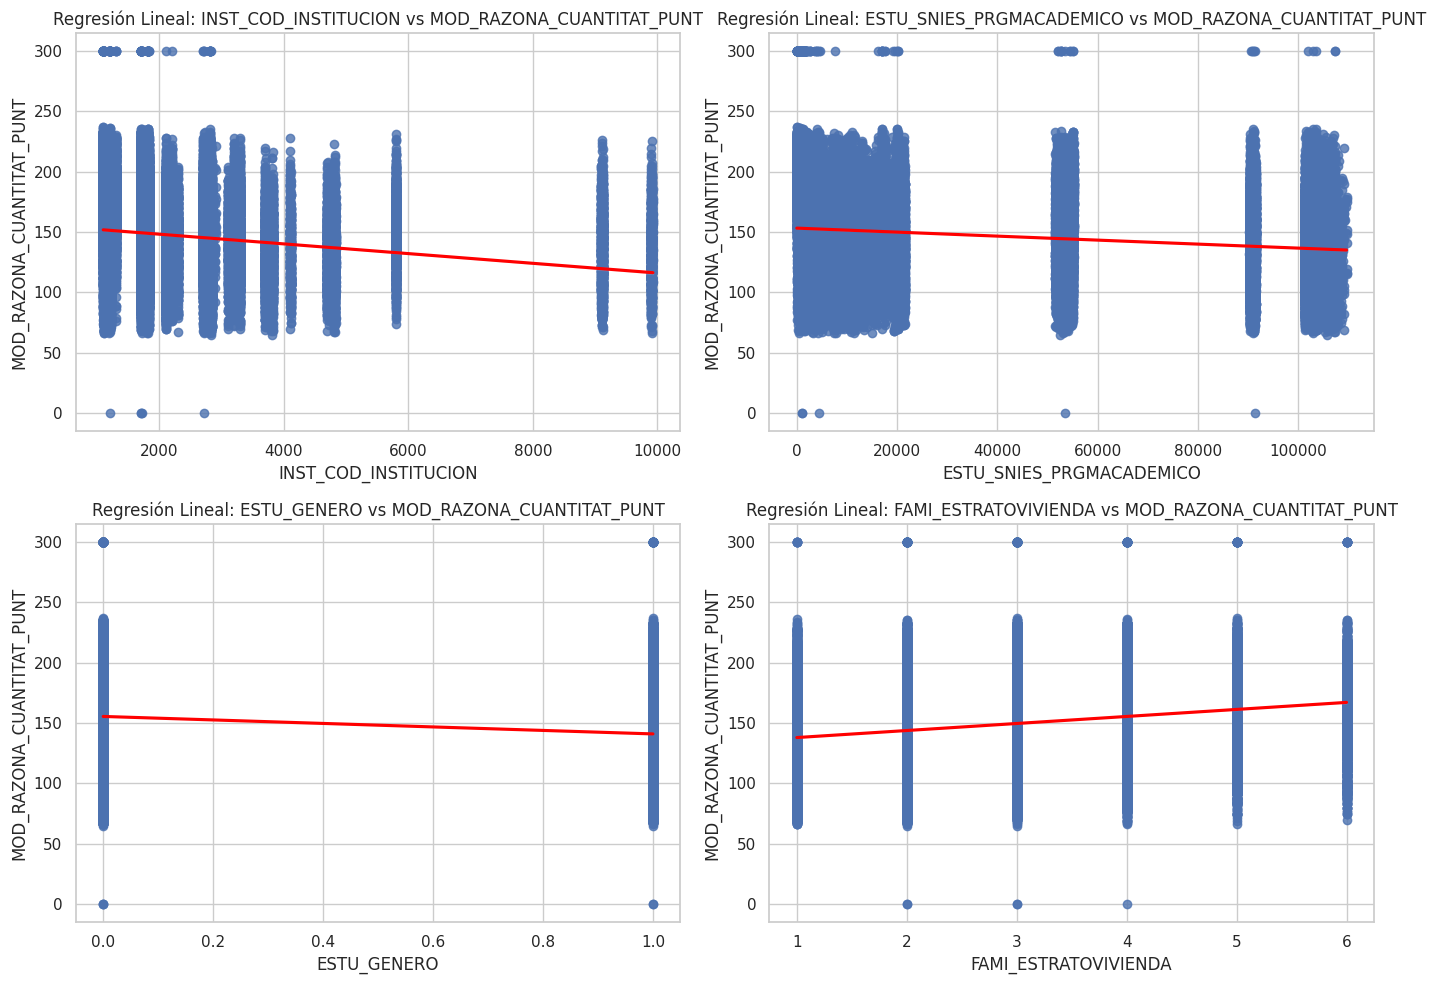

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar el estilo de Seaborn para las gráficas
sns.set(style="whitegrid")

# Crear una figura con subplots para cada variable independiente
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Lista de variables independientes
variables_independientes = ['INST_COD_INSTITUCION', 'ESTU_SNIES_PRGMACADEMICO', 'ESTU_GENERO', 'FAMI_ESTRATOVIVIENDA']

for ax, var in zip(axs.flat, variables_independientes):
    sns.regplot(x=datos_numericos[var], y=datos_numericos['MOD_RAZONA_CUANTITAT_PUNT'], ax=ax, line_kws={"color": "red"})
    ax.set_title(f'Regresión Lineal: {var} vs MOD_RAZONA_CUANTITAT_PUNT')

plt.tight_layout()
plt.show()


In [77]:
# Obtener los coeficientes del modelo
coeficientes = modelo.coef_
interseccion = modelo.intercept_

# Crear la ecuación del modelo
ecuacion = f'MOD_RAZONA_CUANTITAT_PUNT = {interseccion:.2f} + ({coeficientes[0]:.2f} * INST_COD_INSTITUCION) + ({coeficientes[1]:.2f} * ESTU_SNIES_PRGMACADEMICO) + ({coeficientes[2]:.2f} * ESTU_GENERO) + ({coeficientes[3]:.2f} * FAMI_ESTRATOVIVIENDA)'

print("Ecuación del modelo de regresión lineal:")
print(ecuacion)


Ecuación del modelo de regresión lineal:
MOD_RAZONA_CUANTITAT_PUNT = 152.71 + (-0.00 * INST_COD_INSTITUCION) + (-0.00 * ESTU_SNIES_PRGMACADEMICO) + (-13.16 * ESTU_GENERO) + (4.86 * FAMI_ESTRATOVIVIENDA)


<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Descripción del Proyecto - Sección 4</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            line-height: 1.6;
            margin: 20px;
        }
        h1, h2, h3 {
            color: #2c3e50;
        }
        p {
            margin: 10px 0;
        }
        ul {
            list-style-type: square;
            margin: 10px 0 10px 20px;
        }
    </style>
</head>
<body>
    <h2>Reevaluación del Modelo y Adopción de Regresión Logística</h2>
    <p>Al notar que la distribución de las gráficas no era sugerente de un modelo normal de regresión lineal y además que la ecuación que describía al modelo hacía cero dos variables, notamos que la regresión lineal no era el modelo más adecuado para hacer predicciones. En vez de ello, un modelo de regresión logística que discriminara entre dos valores hacía una mejor ejecución de las herramientas matemáticas al alcance.</p>
    <p>Además, es evidente que las variables independientes escogidas son de carácter discreto más que continuo, sin embargo, esto no fue tan evidente para nosotros al comienzo. Es por eso que presentamos el modelo de regresión logística a continuación:</p>
    </body>
    <h3>Modelo de Regresión Logística</h3>
    <p>A continuación se detalla el modelo de regresión logística utilizado, el cual permite clasificar los resultados de razonamiento cuantitativo en dos categorías: "Bajo" y "Alto".</p>

</html>


<h2>Análisis de Datos y Modelo de Regresión Logística</h2>
<p>Notemos un error importante en el análisis de datos. El primero es que todas nuestras variables independientes son discretas, en vez de continuas. Por lo tanto, debemos acomodar el modelo de una manera más adecuada. Es por esa razón que usaremos solo dos variables, <strong>estrato</strong> y <strong>género</strong>, y las compararemos con <strong>razonamiento cuantitativo</strong>.</p>



In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Cargar el archivo CSV guardado
ruta_nuevo_csv = '/content/drive/MyDrive/Colab Notebooks/Proyecto_Final_Modelacion/Datos_Numericos_Refinados.csv'
datos_numericos = pd.read_csv(ruta_nuevo_csv)

# Convertir MOD_RAZONA_CUANTITAT_PUNT a categórico (por ejemplo, bajo y alto)
datos_numericos['MOD_RAZONA_CUANTITAT_PUNT_CAT'] = pd.cut(datos_numericos['MOD_RAZONA_CUANTITAT_PUNT'], bins=2, labels=['Bajo', 'Alto'])

# Seleccionar las variables independientes y la variable dependiente categórica
X = datos_numericos[['ESTU_GENERO', 'FAMI_ESTRATOVIVIENDA']]
y = datos_numericos['MOD_RAZONA_CUANTITAT_PUNT_CAT']

# Crear el transformador para las variables categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['ESTU_GENERO', 'FAMI_ESTRATOVIVIENDA'])
    ],
    remainder='passthrough'
)

# Crear el pipeline que incluye la codificación y el modelo de regresión logística
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones y calcular la precisión
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Precisión del modelo:", accuracy)
print('Puntaje máximo:',datos_numericos['MOD_RAZONA_CUANTITAT_PUNT'].max())
print('Cambio de categoría desde: ',datos_numericos['MOD_RAZONA_CUANTITAT_PUNT'].quantile([0.5]))
print("Reporte de clasificación:\n", class_report)


Precisión del modelo: 0.6204874102538174
Puntaje máximo: 300
Cambio de categoría desde:  0.5    147.0
Name: MOD_RAZONA_CUANTITAT_PUNT, dtype: float64
Reporte de clasificación:
               precision    recall  f1-score   support

        Alto       0.60      0.49      0.54      8921
        Bajo       0.63      0.73      0.68     10857

    accuracy                           0.62     19778
   macro avg       0.62      0.61      0.61     19778
weighted avg       0.62      0.62      0.61     19778



Tabla de resultados

Tabla de discriminación por variable independiente

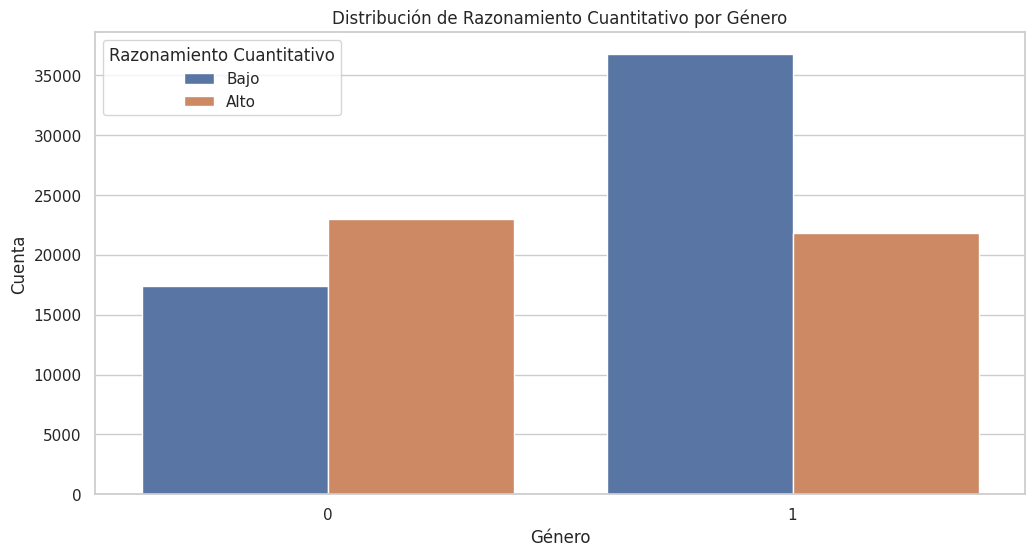

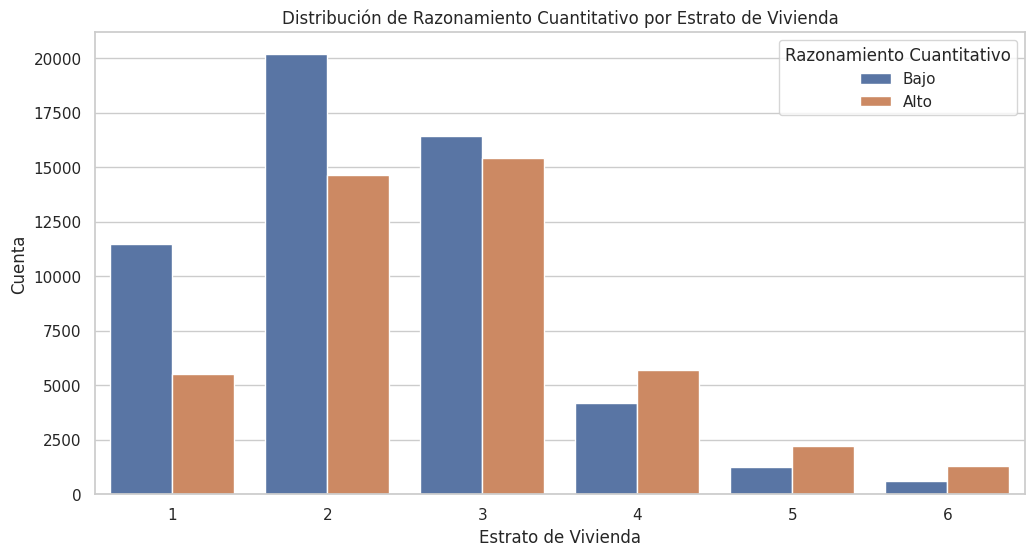

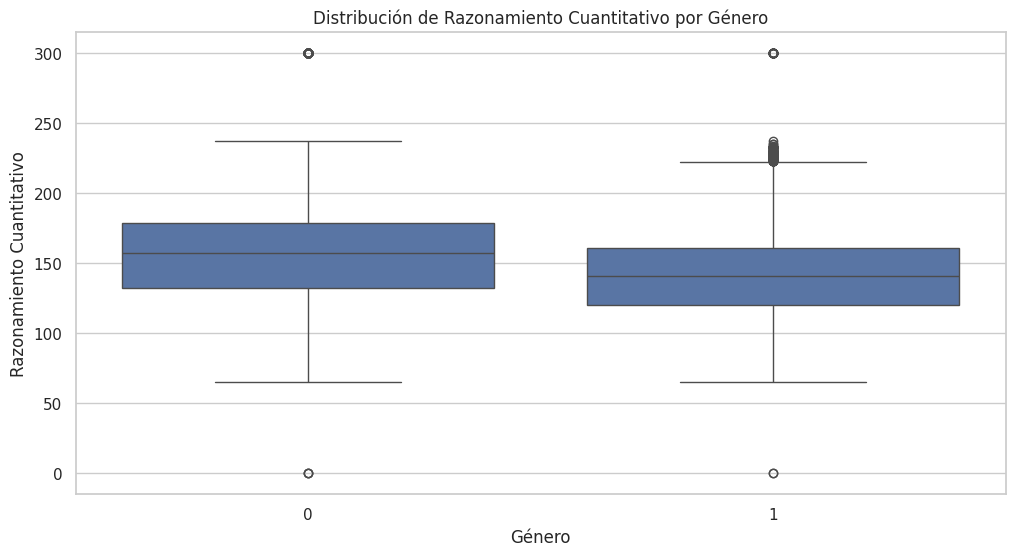

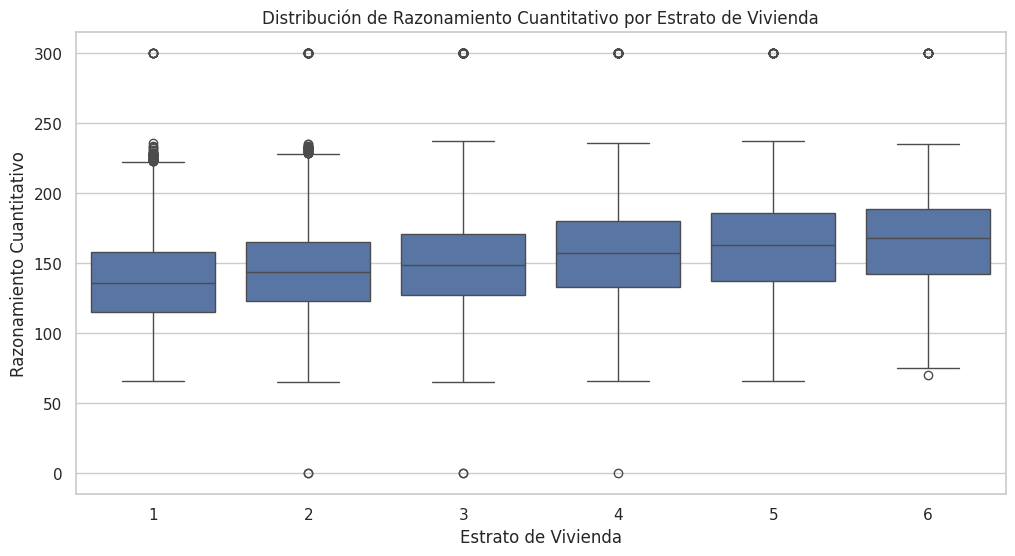

In [80]:
# Convertir MOD_RAZONA_CUANTITAT_PUNT a categórico (por ejemplo, bajo y alto)
datos_numericos['MOD_RAZONA_CUANTITAT_PUNT_CAT'] = pd.cut(datos_numericos['MOD_RAZONA_CUANTITAT_PUNT'], bins=2, labels=['Bajo', 'Alto'])

# Gráfico de barras para mostrar la distribución de MOD_RAZONA_CUANTITAT_PUNT_CAT por ESTU_GENERO
plt.figure(figsize=(12, 6))
sns.countplot(x='ESTU_GENERO', hue='MOD_RAZONA_CUANTITAT_PUNT_CAT', data=datos_numericos)
plt.title('Distribución de Razonamiento Cuantitativo por Género')
plt.xlabel('Género')
plt.ylabel('Cuenta')
plt.legend(title='Razonamiento Cuantitativo')
plt.show()

# Gráfico de barras para mostrar la distribución de MOD_RAZONA_CUANTITAT_PUNT_CAT por FAMI_ESTRATOVIVIENDA
plt.figure(figsize=(12, 6))
sns.countplot(x='FAMI_ESTRATOVIVIENDA', hue='MOD_RAZONA_CUANTITAT_PUNT_CAT', data=datos_numericos)
plt.title('Distribución de Razonamiento Cuantitativo por Estrato de Vivienda')
plt.xlabel('Estrato de Vivienda')
plt.ylabel('Cuenta')
plt.legend(title='Razonamiento Cuantitativo')
plt.show()

# Gráfico de cajas para mostrar la distribución de MOD_RAZONA_CUANTITAT_PUNT por ESTU_GENERO
plt.figure(figsize=(12, 6))
sns.boxplot(x='ESTU_GENERO', y='MOD_RAZONA_CUANTITAT_PUNT', data=datos_numericos)
plt.title('Distribución de Razonamiento Cuantitativo por Género')
plt.xlabel('Género')
plt.ylabel('Razonamiento Cuantitativo')
plt.show()

# Gráfico de cajas para mostrar la distribución de MOD_RAZONA_CUANTITAT_PUNT por FAMI_ESTRATOVIVIENDA
plt.figure(figsize=(12, 6))
sns.boxplot(x='FAMI_ESTRATOVIVIENDA', y='MOD_RAZONA_CUANTITAT_PUNT', data=datos_numericos)
plt.title('Distribución de Razonamiento Cuantitativo por Estrato de Vivienda')
plt.xlabel('Estrato de Vivienda')
plt.ylabel('Razonamiento Cuantitativo')
plt.show()

<h2>Resultados del Modelo de Regresión Logística</h2>
<p>A continuación se presentan los resultados del modelo de regresión logística que predice la categoría de <strong>MOD_RAZONA_CUANTITAT_PUNT</strong> basada en las variables <strong>FAMI_ESTRATOVIVIENDA</strong> y <strong>ESTU_GENERO</strong>.</p>

<h3>Métricas del Modelo</h3>
<table border="1" cellpadding="5" cellspacing="0">
    <tr>
        <th>Métrica</th>
        <th>Valor</th>
    </tr>
    <tr>
        <td>Precisión del modelo</td>
        <td>0.620487</td>
    </tr>
    <tr>
        <td>Puntaje máximo</td>
        <td>300</td>
    </tr>
    <tr>
        <td>Cambio de categoría desde</td>
        <td>147.0</td>
    </tr>
    <tr>
        <td>Reporte de clasificación</td>
        <td>Ver reporte abajo</td>
    </tr>
</table>

<h3>Interpretación de las Métricas</h3>
<ul>
    <li><strong>Precisión del modelo:</strong> La precisión del modelo es de 0.620487, lo que indica que el modelo predice correctamente el 62.05% de los casos en el conjunto de prueba.</li>
    <li><strong>Puntaje máximo:</strong> El puntaje máximo observado en <em>MOD_RAZONA_CUANTITAT_PUNT</em> es 300.</li>
    <li><strong>Cambio de categoría desde:</strong> El puntaje de <em>MOD_RAZONA_CUANTITAT_PUNT</em> que define el límite entre las categorías "Bajo" y "Alto" es 147.0.</li>
</ul>

<h3>Reporte de Clasificación</h3>
<table border="1" cellpadding="5" cellspacing="0">
    <tr>
        <th></th>
        <th>precision</th>
        <th>recall</th>
        <th>f1-score</th>
        <th>support</th>
    </tr>
    <tr>
        <td>Alto</td>
        <td>0.597304</td>
        <td>0.486829</td>
        <td>0.536438</td>
        <td>8921</td>
    </tr>
    <tr>
        <td>Bajo</td>
        <td>0.633965</td>
        <td>0.730312</td>
        <td>0.678737</td>
        <td>10857</td>
    </tr>
    <tr>
        <td>accuracy</td>
        <td>0.620487</td>
        <td>0.620487</td>
        <td>0.620487</td>
        <td>19778</td>
    </tr>
    <tr>
        <td>macro avg</td>
        <td>0.615635</td>
        <td>0.608571</td>
        <td>0.607587</td>
        <td>19778</td>
    </tr>
    <tr>
        <td>weighted avg</td>
        <td>0.617429</td>
        <td>0.620487</td>
        <td>0.614552</td>
        <td>19778</td>
    </tr>
</table>

<h3>Interpretación del Reporte de Clasificación</h3>
<ul>
    <li><strong>Precision:</strong> La precisión (precision) es la proporción de verdaderos positivos sobre el total de predicciones positivas. Indica cuántas de las predicciones positivas son realmente correctas.
        <ul>
            <li>Para la categoría "Alto": 0.597304, significa que el 59.73% de las predicciones etiquetadas como "Alto" son correctas.</li>
            <li>Para la categoría "Bajo": 0.633965, significa que el 63.40% de las predicciones etiquetadas como "Bajo" son correctas.</li>
        </ul>
    </li>
    <li><strong>Recall:</strong> El recall es la proporción de verdaderos positivos sobre el total de positivos reales. Indica cuántos de los casos positivos reales fueron capturados por el modelo.
        <ul>
            <li>Para la categoría "Alto": 0.486829, significa que el 48.68% de los casos que son realmente "Alto" fueron correctamente identificados.</li>
            <li>Para la categoría "Bajo": 0.730312, significa que el 73.03% de los casos que son realmente "Bajo" fueron correctamente identificados.</li>
        </ul>
    </li>
    <li><strong>F1-Score:</strong> El f1-score es la media armónica de la precisión y el recall. Proporciona una medida equilibrada de ambos, útil cuando se busca un balance entre precisión y recall.
        <ul>
            <li>Para la categoría "Alto": 0.536438, es un equilibrio entre la precisión y el recall para la categoría "Alto".</li>
            <li>Para la categoría "Bajo": 0.678737, es un equilibrio entre la precisión y el recall para la categoría "Bajo".</li>
        </ul>
    </li>
    <li><strong>Support:</strong> El support es el número de ocurrencias reales de la clase en el conjunto de datos. Indica cuántos ejemplos de cada categoría había en el conjunto de prueba.
        <ul>
            <li>Para la categoría "Alto": 8921 casos.</li>
            <li>Para la categoría "Bajo": 10857 casos.</li>
        </ul>
    </li>
    <li><strong>Accuracy:</strong> La precisión global (accuracy) es la proporción de todas las predicciones correctas sobre el total de casos. En este caso, el 62.05% de todas las predicciones fueron correctas.
    </li>
    <li><strong>Macro Avg:</strong> El promedio macro (macro avg) es el promedio de precisión, recall y f1-score calculado sin ponderar las clases. Proporciona una medida general del rendimiento del modelo.
        <ul>
            <li>Precisión macro: 0.615635</li>
            <li>Recall macro: 0.608571</li>
            <li>F1-score macro: 0.607587</li>
        </ul>
    </li>
    <li><strong>Weighted Avg:</strong> El promedio ponderado (weighted avg) es el promedio de precisión, recall y f1-score calculado ponderando por el número de ocurrencias de cada clase. Proporciona una medida del rendimiento del modelo que tiene en cuenta la prevalencia de cada clase.
        <ul>
            <li>Precisión ponderada: 0.617429</li>
            <li>Recall ponderado: 0.620487</li>
            <li>F1-score ponderado: 0.614552</li>
        </ul>
    </li>
</ul>


<h2>Agradecimientos</h2>
<p>Este proyecto fue realizado con la enorme contribución de ChatGPT, desarrollado por OpenAI. Agradecemos profundamente su asistencia en el análisis de datos, la implementación de modelos de regresión y la elaboración de este informe.</p>
